# Predicting Car Prices

In this project, we'll practice a machine learning workflow to predict a car's market price using its attributes. The data set we will be working with contains information on various cars. For each car we have information about the technical aspects of the vehicle such as the motor's displacement, the weight of the car, the miles per gallon, how fast the car accelerates, and more. You can read more about the data set [here](https://archive.ics.uci.edu/ml/datasets/automobile) and can download it directly from [here](https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data).

In [192]:
import pandas as pd

cols = ['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 
        'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type', 
        'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-rate', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']
cars = pd.read_csv('imports-85.data', names=cols)
cars.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


Determine which columns are numeric and can be used as features and which column is the target column.

In [193]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

The cars' price is the target variable, but we have to turn it into a numeric column.
For the features, we could use:
- horsepower
- peak-rpm
- city-mpg
- highway-pmg
- engine size

We will have to turn all of these into numeric columns.

First, we will replace all the "?" values with nans

In [194]:
import numpy as np

cars.replace('?', np.nan, inplace=True)

In [195]:
cars[['price', 'horsepower', 'peak-rpm']] = cars[['price', 'horsepower', 'peak-rpm']].astype(float)
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  164 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       203 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [196]:
cars.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


The normalized losses column has too many missing values so we'll drop it.
Let's explore the missing values in the other columns of interest:

In [197]:
cars[cars['price'].isnull()]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
9,0,NaN,audi,gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.0,160.0,5500.0,16,22,NaN
44,1,NaN,isuzu,gas,std,two,sedan,fwd,front,94.5,...,90,2bbl,3.03,3.11,9.6,70.0,5400.0,38,43,NaN
45,0,NaN,isuzu,gas,std,four,sedan,fwd,front,94.5,...,90,2bbl,3.03,3.11,9.6,70.0,5400.0,38,43,NaN
129,1,NaN,porsche,gas,std,two,hatchback,rwd,front,98.4,...,203,mpfi,3.94,3.11,10.0,288.0,5750.0,17,28,NaN


Let's just keep the columns of interest, and let's drop the rows with nan values.

In [198]:
carm = cars[['engine-size', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']].copy()
carm = carm.dropna()
carm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 199 entries, 0 to 204
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   engine-size  199 non-null    int64  
 1   horsepower   199 non-null    float64
 2   peak-rpm     199 non-null    float64
 3   city-mpg     199 non-null    int64  
 4   highway-mpg  199 non-null    int64  
 5   price        199 non-null    float64
dtypes: float64(3), int64(3)
memory usage: 10.9 KB


In [199]:
carm.head(10)

,engine-size,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,130,111.0,5000.0,21,27,13495.0
1,130,111.0,5000.0,21,27,16500.0
2,152,154.0,5000.0,19,26,16500.0
3,109,102.0,5500.0,24,30,13950.0
4,136,115.0,5500.0,18,22,17450.0
5,136,110.0,5500.0,19,25,15250.0
6,136,110.0,5500.0,19,25,17710.0
7,136,110.0,5500.0,19,25,18920.0
8,131,140.0,5500.0,17,20,23875.0
10,108,101.0,5800.0,23,29,16430.0


Now let's normalize the values.

In [200]:
# Normalize all columnns to range from 0 to 1 except the target column.
price_col = carm['price']
carm_scaled = (carm - carm.min())/(carm.max() - carm.min())
carm_scaled['price'] = price_col
carm_scaled.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 199 entries, 0 to 204
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   engine-size  199 non-null    float64
 1   horsepower   199 non-null    float64
 2   peak-rpm     199 non-null    float64
 3   city-mpg     199 non-null    float64
 4   highway-mpg  199 non-null    float64
 5   price        199 non-null    float64
dtypes: float64(6)
memory usage: 10.9 KB


### Univariate k-nearest neighbors model

Let's start with some univariate k-nearest neighbors models. Starting with simple models before moving to more complex models helps us structure your code workflow and understand the features better.

In [201]:
# let's define a function to do this:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

def knn_train_test(train_col, target_col, df):
    shuffled_index = np.random.permutation(df.index)
    df = df.reindex(shuffled_index)
    
    length_df = len(df)
    split_point = int(round(length_df*0.5))
    train_set = df.iloc[0:split_point]
    test_set = df.iloc[split_point:]
    
    k_values = [1,3,5,7,9]
    rmses = {}
    
    for k in k_values:
        knn = KNeighborsRegressor(n_neighbors=k)
        knn.fit(train_set[[train_col]], train_set[target_col])
        predictions = knn.predict(test_set[[train_col]])
        mse = mean_squared_error(test_set[target_col], predictions)
        rmses[k] = np.sqrt(mse)
    return rmses

In [202]:
train_cols = ['engine-size', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg']
ks = {}
for col in train_cols:
    rmse = knn_train_test(col, 'price', carm_scaled)
    ks[col] = rmse

In [203]:
ks

{'engine-size': {1: 3423.9628496757373,
  3: 3316.5312687453525,
  5: 3429.9620950875496,
  7: 3275.3417437329404,
  9: 3136.0542164095923},
 'horsepower': {1: 6007.592428575593,
  3: 5845.295319058172,
  5: 5754.935343553813,
  7: 5202.658201315905,
  9: 5386.357869077887},
 'peak-rpm': {1: 8458.511564624647,
  3: 7520.83144051759,
  5: 8089.205598209321,
  7: 8079.347884241079,
  9: 7889.821385277521},
 'city-mpg': {1: 4491.095191621084,
  3: 4624.660038222896,
  5: 4652.780841083268,
  7: 4705.183157504146,
  9: 4695.221602836028},
 'highway-mpg': {1: 6982.47752693422,
  3: 5149.393760641386,
  5: 4573.42576830343,
  7: 4639.477556639002,
  9: 5057.035020422567}}

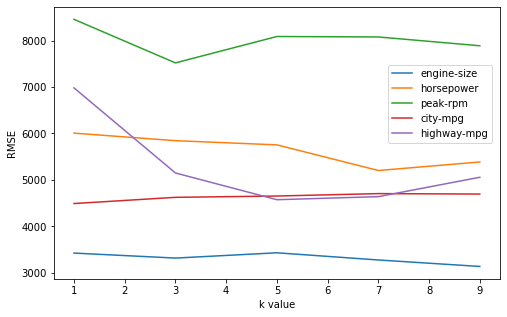

In [204]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(8,5))

for k,v in ks.items():
    x = list(v.keys())
    y = list(v.values())
    plt.plot(x,y, label=k)
    plt.legend(loc=(0.75,0.5))
    plt.xlabel('k value')
    plt.ylabel('RMSE')

### Multivariate k-nearest neighbors model

In [205]:
def knn_train_test(train_col_list, target_col, df):
    shuffled_index = np.random.permutation(df.index)
    df = df.reindex(shuffled_index)
    
    length_df = len(df)
    split_point = int(round(length_df*0.5))
    train_set = df.iloc[0:split_point]
    test_set = df.iloc[split_point:]
    
    knn = KNeighborsRegressor()
    knn.fit(train_set[train_col_list], train_set[target_col])
    predictions = knn.predict(test_set[train_col_list])
    mse = mean_squared_error(test_set[target_col], predictions)
    rmse = np.sqrt(mse)
    return rmse

In [206]:
# compute average RMSE for the previous features
# Compute average RMSE across different `k` values for each feature.
feature_avg_rmse = {}
for k,v in ks.items():
    avg_rmse = np.mean(list(v.values()))
    feature_avg_rmse[k] = avg_rmse
series_avg_rmse = pd.Series(feature_avg_rmse)
sorted_series_avg_rmse = series_avg_rmse.sort_values()
print(sorted_series_avg_rmse)

engine-size    3316.370435
city-mpg       4633.788166
highway-mpg    5280.361927
horsepower     5639.367832
peak-rpm       8007.543575
dtype: float64


### Using the best 2 features to train a multivariate model

In [207]:
train_cols = ['engine-size','city-mpg']
rmse_two = knn_train_test(train_cols, 'price', carm_scaled)
print(rmse_two)

3661.7946432995077


### Using the best 3 features to train the model

In [208]:
train_cols = ['engine-size', 'horsepower', 'city-mpg']
rmse_three = knn_train_test(train_cols, 'price', carm_scaled)
print(rmse_three)

2489.2807254508302


### Using the best 4 features to train the model

In [209]:
train_cols = ['engine-size', 'horsepower', 'city-mpg', 'highway-mpg']
rmse_four = knn_train_test(train_cols, 'price', carm_scaled)
print(rmse_four)

3618.0361915315775


### Using all five features

In [210]:
train_cols = ['engine-size', 'horsepower', 'city-mpg', 'highway-mpg', 'peak-rpm']
rmse_five = knn_train_test(train_cols, 'price', carm_scaled)
print(rmse_five)

3088.3662619056


In [211]:
print(' Two features:',rmse_two,'\n',
      'Three features:', rmse_three,'\n',
      'Four features:', rmse_four,'\n', 
      'Five features:', rmse_five)

 Two features: 3661.7946432995077 
 Three features: 2489.2807254508302 
 Four features: 3618.0361915315775 
 Five features: 3088.3662619056


## Hyperparameter tuning

In [212]:
def knn_train_test(train_col_list, target_col, df):
    shuffled_index = np.random.permutation(df.index)
    df = df.reindex(shuffled_index)
    
    length_df = len(df)
    split_point = int(round(length_df*0.5))
    train_set = df.iloc[0:split_point]
    test_set = df.iloc[split_point:]
    
    k_values = [i for i in range(1,25)]
    rmses = {}
    
    for k in k_values:
        knn = KNeighborsRegressor(n_neighbors=k)
        knn.fit(train_set[train_col_list], train_set[target_col])
        predictions = knn.predict(test_set[train_col_list])
        mse = mean_squared_error(test_set[target_col], predictions)
        rmses[k] = np.sqrt(mse)
    return rmses

In [213]:
train_cols = ['engine-size', 'horsepower', 'city-mpg', 'highway-mpg']
rmse_four = knn_train_test(train_cols, 'price', carm_scaled)
print(rmse_four)

{1: 3162.296713632436, 2: 3110.6070439414525, 3: 3011.8011017567565, 4: 3143.863877588863, 5: 3105.609821668595, 6: 3320.7153152757046, 7: 3365.368007179554, 8: 3586.4024693102974, 9: 3650.897532285149, 10: 3751.557923117415, 11: 3893.6545729087197, 12: 4067.0502420078005, 13: 4170.173496923294, 14: 4234.475263429528, 15: 4317.834901793609, 16: 4447.208591460268, 17: 4503.802210406183, 18: 4576.533920943728, 19: 4605.368026529848, 20: 4627.903865352482, 21: 4673.712181704265, 22: 4715.245648439464, 23: 4694.916371897517, 24: 4706.003371548377}


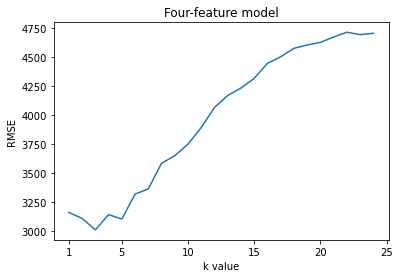

In [214]:
plt.plot(rmse_four.keys(),rmse_four.values())
plt.xlabel('k value')
plt.ylabel('RMSE')
plt.xticks([1,5,10,15,20,25])
plt.title('Four-feature model')
plt.show()

In [215]:
train_cols = ['engine-size','city-mpg']
rmse_two = knn_train_test(train_cols, 'price', carm_scaled)
print(rmse_two)

{1: 3330.0692336661864, 2: 2957.454242838737, 3: 3022.51411933365, 4: 3245.8811412630425, 5: 3270.5131932885924, 6: 3296.2637722641657, 7: 3383.871355267544, 8: 3575.9250117570414, 9: 3771.5880688269526, 10: 3936.330131639434, 11: 4126.022094683957, 12: 4053.9328080335845, 13: 4125.888019186306, 14: 4179.720272997104, 15: 4182.131182228119, 16: 4200.395003591676, 17: 4324.249579759724, 18: 4402.296534494456, 19: 4414.128561854002, 20: 4478.789605727616, 21: 4557.460995854888, 22: 4622.761846602983, 23: 4656.374447652801, 24: 4729.334368733699}


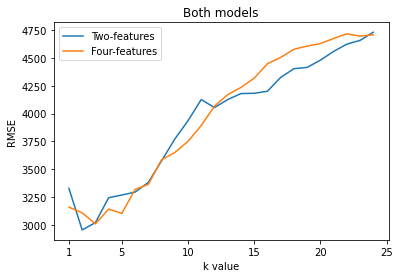

In [216]:
plt.plot(rmse_two.keys(),rmse_two.values(), label='Two-features')
plt.plot(rmse_four.keys(),rmse_four.values(), label='Four-features')
plt.xlabel('k value')
plt.ylabel('RMSE')
plt.legend()
plt.xticks([1,5,10,15,20,25])
plt.title('Both models')
plt.show()

## Conclusions

Our two best k-nearest neighbor models to predict car prices were:

- a two-feature model using engine size and city mpgs, using a k of 1;
- and a four-feature model (engine size, horsepower, city mpgs, highway mpgs) with a k of 2.